In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import time
import matplotlib.tri as tri
from scipy.interpolate import griddata
import seaborn as sns


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr
import metpy
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt

In [3]:
##b creek

In [4]:
bd_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt", delimiter=',')
#pd.set_option('display.max_columns', None)


bd_df1.head(1)

/jobfs/133097049.gadi-pbs/ipykernel_3393820/570797212.py:1: DtypeWarning: Columns (12,14,15,17,19,21,24,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  bd_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt", delimiter=',')


hd  Station Number   Year Month Day Hour Minutes in YYYY  MM  DD  HH24  \
0  hd           67108                                  1998  12   4    15   

   MI format in Local standard time   Year Month Day Hour Minutes in YYYY.1  \
0                                17                                    1998   

   MM.1  DD.1  ...  \
0    12     4  ...   

   Quality of Highest maximum 3 sec wind gust in last 1 minutes  \
0                                                  N              

   Count of Highest maximum 3 sec wind gust observations in last 1 minutes  \
0                                                  1                         

  Average direction of wind in last 1 minutes in degrees true where observations count >= 0  \
0                                                 99                                          

  Quality of average direction of wind in last 1 minutes  \
0                                                  N       

  Count of average direction of wind observations in last 1 minutes  \
0                                                  1                  

  Maximum wind gust (over 1 minute) in km/h  \
0                                      22.3   

  Maximum wind gust (over 1 minute) quality Mean sea level pressure in hPa  \
0                                         N                         1009.4   

  Quality of mean sea level pressure  #  
0                                  N  #  

[1 rows x 32 columns]

In [5]:
import pandas as pd

bd_df1 = pd.read_csv("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt")

# Set the option to display all columns (None means no limit)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(bd_df1)

/jobfs/133097049.gadi-pbs/ipykernel_3393820/1361608381.py:3: DtypeWarning: Columns (12,14,15,17,19,21,24,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  bd_df1 = pd.read_csv("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt")


          hd  Station Number   Year Month Day Hour Minutes in YYYY  MM  DD  \
0         hd           67108                                  1998  12   4   
1         hd           67108                                  1998  12   4   
2         hd           67108                                  1998  12   4   
3         hd           67108                                  1998  12   4   
4         hd           67108                                  1998  12   4   
...       ..             ...                                   ...  ..  ..   
12049875  hd           67108                                  2021  11   1   
12049876  hd           67108                                  2021  11   1   
12049877  hd           67108                                  2021  11   1   
12049878  hd           67108                                  2021  11   1   
12049879  hd           67108                                  2021  11   1   

          HH24  MI format in Local standard time  \
0          

In [6]:
bd_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt", delimiter=',', usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
            "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
            "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])


bd_df1.head(5)

/jobfs/133097049.gadi-pbs/ipykernel_3393820/590004963.py:1: DtypeWarning: Columns (12,15,17,21,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  bd_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/badgery.txt", delimiter=',', usecols=[


Year Month Day Hour Minutes in YYYY  MM  DD  HH24  \
0                                  1998  12   4    15   
1                                  1998  12   4    15   
2                                  1998  12   4    15   
3                                  1998  12   4    15   
4                                  1998  12   4    15   

   MI format in Universal coordinated time  \
0                                       17   
1                                       18   
2                                       19   
3                                       20   
4                                       21   

  Precipitation since last (AWS) observation in mm  \
0                                                    
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

  Air Temperature in degrees Celsius Dew point temperature in degrees Celsius  \
0                               22.9                                     15.0   
1                               22.9                                     15.3   
2                               22.9                                     15.0   
3                               22.6                                     15.0   
4                               22.6                                     15.2   

  Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0  \
0                                               22.3                                        
1                                               25.9                                        
2                                               20.5                                        
3                                               31.3                                        
4                                               25.9                                        

  Average direction of wind in last 1 minutes in degrees true where observations count >= 0  \
0                                                 99                                          
1                                                102                                          
2                                                142                                          
3                                                148                                          
4                                                143                                          

  Mean sea level pressure in hPa  
0                         1009.4  
1                         1009.5  
2                         1009.5  
3                         1009.5  
4                         1009.5

In [7]:
bd_df = bd_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

bd_df.tail(10)

YYYY  MM  DD  HH24  MI precipitation  temp   dew windspeed  \
12049870  2021  11   1    14  27           0.0  23.3  10.0      12.6   
12049871  2021  11   1    14  28           0.0  23.2  10.2       9.7   
12049872  2021  11   1    14  29           0.0  23.4  10.8      12.2   
12049873  2021  11   1    14  30           0.0  23.5  10.2       9.7   
12049874  2021  11   1    14  31           0.0  23.6  10.6      10.8   
12049875  2021  11   1    14  32           0.0  23.7  10.7      11.2   
12049876  2021  11   1    14  33           0.0  23.6   9.9       8.3   
12049877  2021  11   1    14  34           0.0  23.5  10.2      14.0   
12049878  2021  11   1    14  35           0.0  23.8  10.8      14.8   
12049879  2021  11   1    14  36           0.0  23.6  10.3      14.0   

         direction    mslp  
12049870        47  1023.1  
12049871        31  1023.1  
12049872        57  1023.1  
12049873        61  1023.1  
12049874        62  1023.1  
12049875        66  1023.1  
12049876        66  1023.1  
12049877        45  1023.1  
12049878         6  1023.1  
12049879        16  1023.1

In [8]:
bd_df['temp'] =pd.to_numeric(bd_df['temp'] , errors="coerce")
bd_df['dew'] =pd.to_numeric(bd_df['dew'] , errors="coerce")
bd_df['YYYY'] =pd.to_numeric(bd_df['YYYY'] , errors="coerce")
bd_df['MM'] =pd.to_numeric(bd_df['MM'] , errors="coerce")
bd_df['DD'] =pd.to_numeric(bd_df['DD'] , errors="coerce")
bd_df['HH24'] =pd.to_numeric(bd_df['HH24'] , errors="coerce")
bd_df['MI'] =pd.to_numeric(bd_df['MI'] , errors="coerce")
bd_df['windspeed'] =pd.to_numeric(bd_df['windspeed'] , errors="coerce")
bd_df['direction'] =pd.to_numeric(bd_df['direction'] , errors="coerce")
bd_df['precipitation'] =pd.to_numeric(bd_df['precipitation'] , errors="coerce")
bd_df['mslp'] =pd.to_numeric(bd_df['mslp'] , errors="coerce")



bd_df['temp']=bd_df['temp'].astype(float)
bd_df['dew']=bd_df['dew'].astype(float)
bd_df['YYYY']=bd_df['YYYY'].astype(int)
bd_df['MM']=bd_df['MM'].astype(int)
bd_df['DD']=bd_df['DD'].astype(int)
bd_df['HH24']=bd_df['HH24'].astype(int)
bd_df['MI']=bd_df['MI'].astype(int)
bd_df['windspeed']=bd_df['windspeed'].astype(float)
bd_df['direction']=bd_df['direction'].astype(float)
bd_df['precipitation']=bd_df['precipitation'].astype(float)
bd_df['mslp']=bd_df['mslp'].astype(float)


bd_df=bd_df.dropna()
bd_df.tail(10)

YYYY  MM  DD  HH24  MI  precipitation  temp   dew  windspeed  \
12049870  2021  11   1    14  27            0.0  23.3  10.0       12.6   
12049871  2021  11   1    14  28            0.0  23.2  10.2        9.7   
12049872  2021  11   1    14  29            0.0  23.4  10.8       12.2   
12049873  2021  11   1    14  30            0.0  23.5  10.2        9.7   
12049874  2021  11   1    14  31            0.0  23.6  10.6       10.8   
12049875  2021  11   1    14  32            0.0  23.7  10.7       11.2   
12049876  2021  11   1    14  33            0.0  23.6   9.9        8.3   
12049877  2021  11   1    14  34            0.0  23.5  10.2       14.0   
12049878  2021  11   1    14  35            0.0  23.8  10.8       14.8   
12049879  2021  11   1    14  36            0.0  23.6  10.3       14.0   

          direction    mslp  
12049870       47.0  1023.1  
12049871       31.0  1023.1  
12049872       57.0  1023.1  
12049873       61.0  1023.1  
12049874       62.0  1023.1  
12049875       66.0  1023.1  
12049876       66.0  1023.1  
12049877       45.0  1023.1  
12049878        6.0  1023.1  
12049879       16.0  1023.1

In [9]:
# bd_df['temp'] = bd_df['temp'] + 273.15
# bd_df['dew'] = bd_df['dew'] + 273.15
bd_df['windspeed'] = bd_df['windspeed']*(5/18)
bd_df.tail(10)

YYYY  MM  DD  HH24  MI  precipitation  temp   dew  windspeed  \
12049870  2021  11   1    14  27            0.0  23.3  10.0   3.500000   
12049871  2021  11   1    14  28            0.0  23.2  10.2   2.694444   
12049872  2021  11   1    14  29            0.0  23.4  10.8   3.388889   
12049873  2021  11   1    14  30            0.0  23.5  10.2   2.694444   
12049874  2021  11   1    14  31            0.0  23.6  10.6   3.000000   
12049875  2021  11   1    14  32            0.0  23.7  10.7   3.111111   
12049876  2021  11   1    14  33            0.0  23.6   9.9   2.305556   
12049877  2021  11   1    14  34            0.0  23.5  10.2   3.888889   
12049878  2021  11   1    14  35            0.0  23.8  10.8   4.111111   
12049879  2021  11   1    14  36            0.0  23.6  10.3   3.888889   

          direction    mslp  
12049870       47.0  1023.1  
12049871       31.0  1023.1  
12049872       57.0  1023.1  
12049873       61.0  1023.1  
12049874       62.0  1023.1  
12049875       66.0  1023.1  
12049876       66.0  1023.1  
12049877       45.0  1023.1  
12049878        6.0  1023.1  
12049879       16.0  1023.1

In [10]:
bd_df1=bd_df[bd_df['YYYY']==2016]
bd_df2=bd_df1[bd_df1['MM'].isin([1])]
bd_df3=bd_df2[bd_df2['DD'].isin([26,27,28,29])]

In [11]:
bd_df4=bd_df3.reset_index(drop=True)

bd_test = bd_df4


import datetime
bd_test["Time"] = bd_test["YYYY"].astype(str) + "-" + bd_test["MM"].astype(str) + "-" + bd_test["DD"].astype(str) + "T" + bd_test['HH24'].astype(str) +":"+ bd_test['MI'].astype(str)+":"+ "00"
bd_test["clean_time"] = bd_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


bdindex=bd_test['clean_time']
bd_test


YYYY  MM  DD  HH24  MI  precipitation  temp   dew  windspeed  direction  \
0     2016   1  26     0   0            0.0  20.2  20.0   1.500000       87.0   
1     2016   1  26     0   1            0.0  20.2  20.0   1.805556       87.0   
2     2016   1  26     0   2            0.0  20.3  20.3   1.611111       87.0   
3     2016   1  26     0   3            0.0  20.3  20.3   1.500000       87.0   
4     2016   1  26     0   4            0.0  20.4  20.4   1.111111       87.0   
...    ...  ..  ..   ...  ..            ...   ...   ...        ...        ...   
5755  2016   1  29    23  55            0.0  18.8  18.8   1.500000      217.0   
5756  2016   1  29    23  56            0.0  18.9  18.9   1.388889      217.0   
5757  2016   1  29    23  57            0.0  18.8  18.8   1.388889      217.0   
5758  2016   1  29    23  58            0.0  18.8  18.8   1.111111      217.0   
5759  2016   1  29    23  59            0.0  18.8  18.8   0.888889      217.0   

        mslp                Time          clean_time  
0     1014.9    2016-1-26T0:0:00 2016-01-26 00:00:00  
1     1014.9    2016-1-26T0:1:00 2016-01-26 00:01:00  
2     1014.9    2016-1-26T0:2:00 2016-01-26 00:02:00  
3     1014.9    2016-1-26T0:3:00 2016-01-26 00:03:00  
4     1014.9    2016-1-26T0:4:00 2016-01-26 00:04:00  
...      ...                 ...                 ...  
5755  1003.5  2016-1-29T23:55:00 2016-01-29 23:55:00  
5756  1003.5  2016-1-29T23:56:00 2016-01-29 23:56:00  
5757  1003.5  2016-1-29T23:57:00 2016-01-29 23:57:00  
5758  1003.5  2016-1-29T23:58:00 2016-01-29 23:58:00  
5759  1003.4  2016-1-29T23:59:00 2016-01-29 23:59:00  

[5760 rows x 13 columns]

In [12]:
import datetime
import numpy

import numpy as np

bda = np.datetime64('2016-01-28T05:58:00.00')
import datetime as dt
bdlapses = [-600+(i-bda)/np.timedelta64(1, 'm') for i in bdindex]

In [13]:
##richmond

In [14]:
ri_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/richmond.txt", delimiter=',', usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
            "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
            "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])

/jobfs/133097049.gadi-pbs/ipykernel_3393820/2030124504.py:1: DtypeWarning: Columns (12,15,17,21,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ri_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/richmond.txt", delimiter=',', usecols=[


In [15]:
ri_df1.head(5)

Year Month Day Hour Minutes in YYYY  MM  DD  HH24  \
0                                  1998  12   4    15   
1                                  1998  12   4    15   
2                                  1998  12   4    15   
3                                  1998  12   4    15   
4                                  1998  12   4    15   

   MI format in Universal coordinated time  \
0                                       17   
1                                       18   
2                                       19   
3                                       20   
4                                       21   

  Precipitation since last (AWS) observation in mm  \
0                                                    
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

  Air Temperature in degrees Celsius Dew point temperature in degrees Celsius  \
0                               25.1                                     14.2   
1                               24.6                                     13.9   
2                               24.6                                     14.0   
3                               24.6                                     13.9   
4                               24.7                                     14.1   

  Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0  \
0                                               35.3                                        
1                                               33.5                                        
2                                               31.3                                        
3                                               35.3                                        
4                                               37.1                                        

  Average direction of wind in last 1 minutes in degrees true where observations count >= 0  \
0                                                116                                          
1                                                116                                          
2                                                117                                          
3                                                106                                          
4                                                117                                          

  Mean sea level pressure in hPa  
0                         1009.3  
1                         1009.3  
2                         1009.3  
3                         1009.3  
4                         1009.3

In [16]:
ri_df = ri_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

In [17]:
ri_df['temp'] =pd.to_numeric(ri_df['temp'] , errors="coerce")
ri_df['dew'] =pd.to_numeric(ri_df['dew'] , errors="coerce")
ri_df['YYYY'] =pd.to_numeric(ri_df['YYYY'] , errors="coerce")
ri_df['MM'] =pd.to_numeric(ri_df['MM'] , errors="coerce")
ri_df['DD'] =pd.to_numeric(ri_df['DD'] , errors="coerce")
ri_df['HH24'] =pd.to_numeric(ri_df['HH24'] , errors="coerce")
ri_df['MI'] =pd.to_numeric(ri_df['MI'] , errors="coerce")
ri_df['windspeed'] =pd.to_numeric(ri_df['windspeed'] , errors="coerce")
ri_df['direction'] =pd.to_numeric(ri_df['direction'] , errors="coerce")
ri_df['precipitation'] =pd.to_numeric(ri_df['precipitation'] , errors="coerce")
ri_df['mslp'] =pd.to_numeric(ri_df['mslp'] , errors="coerce")



ri_df['temp']=ri_df['temp'].astype(float)
ri_df['dew']=ri_df['dew'].astype(float)
ri_df['YYYY']=ri_df['YYYY'].astype(int)
ri_df['MM']=ri_df['MM'].astype(int)
ri_df['DD']=ri_df['DD'].astype(int)
ri_df['HH24']=ri_df['HH24'].astype(int)
ri_df['MI']=ri_df['MI'].astype(int)
ri_df['windspeed']=ri_df['windspeed'].astype(float)
ri_df['direction']=ri_df['direction'].astype(float)
ri_df['precipitation']=ri_df['precipitation'].astype(float)
ri_df['mslp']=ri_df['mslp'].astype(float)


ri_df=ri_df.dropna()

In [18]:
# ri_df['temp'] = ri_df['temp'] + 273.15
# ri_df['dew'] = ri_df['dew'] + 273.15
ri_df['windspeed'] = ri_df['windspeed']*(5/18)

In [19]:
ri_df1=ri_df[ri_df['YYYY']==2001]
ri_df2=ri_df1[ri_df1['MM'].isin([12])]
ri_df3=ri_df2[ri_df2['DD'].isin([2,3])]

In [20]:
ri_df4=ri_df3.reset_index(drop=True)

ri_test = ri_df4


import datetime
ri_test["Time"] = ri_test["YYYY"].astype(str) + "-" + ri_test["MM"].astype(str) + "-" + ri_test["DD"].astype(str) + "T" + ri_test['HH24'].astype(str) +":"+ ri_test['MI'].astype(str)+":"+ "00"
ri_test["clean_time"] = ri_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


riindex=ri_test['clean_time']

In [21]:
import datetime
import numpy

import numpy as np

ria = np.datetime64('2001-12-03T02:43:00.00')

In [22]:
import datetime as dt
rilapses = [-600+(i-ria)/np.timedelta64(1, 'm') for i in riindex]


In [23]:
#moree



In [24]:
mo_df1 =  pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/moree.txt", delimiter=',', usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
            "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
            "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])

/jobfs/133097049.gadi-pbs/ipykernel_3393820/1542232696.py:1: DtypeWarning: Columns (12,15,17,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  mo_df1 =  pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/moree.txt", delimiter=',', usecols=[


In [25]:
mo_df = mo_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

In [26]:
mo_df['temp'] =pd.to_numeric(mo_df['temp'] , errors="coerce")
mo_df['dew'] =pd.to_numeric(mo_df['dew'] , errors="coerce")
mo_df['YYYY'] =pd.to_numeric(mo_df['YYYY'] , errors="coerce")
mo_df['MM'] =pd.to_numeric(mo_df['MM'] , errors="coerce")
mo_df['DD'] =pd.to_numeric(mo_df['DD'] , errors="coerce")
mo_df['HH24'] =pd.to_numeric(mo_df['HH24'] , errors="coerce")
mo_df['MI'] =pd.to_numeric(mo_df['MI'] , errors="coerce")
mo_df['windspeed'] =pd.to_numeric(mo_df['windspeed'] , errors="coerce")
mo_df['direction'] =pd.to_numeric(mo_df['direction'] , errors="coerce")
mo_df['precipitation'] =pd.to_numeric(mo_df['precipitation'] , errors="coerce")
mo_df['mslp'] =pd.to_numeric(mo_df['mslp'] , errors="coerce")



mo_df['temp']=mo_df['temp'].astype(float)
mo_df['dew']=mo_df['dew'].astype(float)
mo_df['YYYY']=mo_df['YYYY'].astype(int)
mo_df['MM']=mo_df['MM'].astype(int)
mo_df['DD']=mo_df['DD'].astype(int)
mo_df['HH24']=mo_df['HH24'].astype(int)
mo_df['MI']=mo_df['MI'].astype(int)
mo_df['windspeed']=mo_df['windspeed'].astype(float)
mo_df['direction']=mo_df['direction'].astype(float)
mo_df['precipitation']=mo_df['precipitation'].astype(float)
mo_df['mslp']=mo_df['mslp'].astype(float)


mo_df=mo_df.dropna()

In [27]:
# mo_df['temp'] = mo_df['temp'] + 273.15
# mo_df['dew'] = mo_df['dew'] + 273.15
mo_df['windspeed'] = mo_df['windspeed']*(5/18)

In [28]:
mo_df1=mo_df[mo_df['YYYY']==2015]
mo_df2=mo_df1[mo_df1['MM'].isin([12])]
mo_df3=mo_df2[mo_df2['DD'].isin([14, 15,16,17])]

In [29]:
mo_df4=mo_df3.reset_index(drop=True)

mo_test = mo_df4


import datetime
mo_test["Time"] = mo_test["YYYY"].astype(str) + "-" + mo_test["MM"].astype(str) + "-" + mo_test["DD"].astype(str) + "T" + mo_test['HH24'].astype(str) +":"+ mo_test['MI'].astype(str)+":"+ "00"
mo_test["clean_time"] = mo_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


moindex=mo_test['clean_time']

In [30]:


import datetime
import numpy

import numpy as np

moa = np.datetime64('2015-12-16T08:19:00.00')

import datetime as dt
molapses = [-600+(i-moa)/np.timedelta64(1, 'm') for i in moindex]

In [31]:
#wagga wagga


In [32]:
wa_df1 =  pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/wagga.txt", delimiter=',',usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
            "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
            "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])

/jobfs/133097049.gadi-pbs/ipykernel_3393820/3980621370.py:1: DtypeWarning: Columns (12,15,17,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  wa_df1 =  pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/wagga.txt", delimiter=',',usecols=[


In [33]:
wa_df = wa_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

In [34]:
wa_df['temp'] =pd.to_numeric(wa_df['temp'] , errors="coerce")
wa_df['dew'] =pd.to_numeric(wa_df['dew'] , errors="coerce")
wa_df['YYYY'] =pd.to_numeric(wa_df['YYYY'] , errors="coerce")
wa_df['MM'] =pd.to_numeric(wa_df['MM'] , errors="coerce")
wa_df['DD'] =pd.to_numeric(wa_df['DD'] , errors="coerce")
wa_df['HH24'] =pd.to_numeric(wa_df['HH24'] , errors="coerce")
wa_df['MI'] =pd.to_numeric(wa_df['MI'] , errors="coerce")
wa_df['windspeed'] =pd.to_numeric(wa_df['windspeed'] , errors="coerce")
wa_df['direction'] =pd.to_numeric(wa_df['direction'] , errors="coerce")
wa_df['precipitation'] =pd.to_numeric(wa_df['precipitation'] , errors="coerce")
wa_df['mslp'] =pd.to_numeric(wa_df['mslp'] , errors="coerce")



wa_df['temp']=wa_df['temp'].astype(float)
wa_df['dew']=wa_df['dew'].astype(float)
wa_df['YYYY']=wa_df['YYYY'].astype(int)
wa_df['MM']=wa_df['MM'].astype(int)
wa_df['DD']=wa_df['DD'].astype(int)
wa_df['HH24']=wa_df['HH24'].astype(int)
wa_df['MI']=wa_df['MI'].astype(int)
wa_df['windspeed']=wa_df['windspeed'].astype(float)
wa_df['direction']=wa_df['direction'].astype(float)
wa_df['precipitation']=wa_df['precipitation'].astype(float)
wa_df['mslp']=wa_df['mslp'].astype(float)


wa_df=wa_df.dropna()

In [35]:
# wa_df['temp'] = wa_df['temp'] + 273.15
# wa_df['dew'] = wa_df['dew'] + 273.15
wa_df['windspeed'] = wa_df['windspeed']*(5/18)

In [36]:
wa_df1=wa_df[wa_df['YYYY']==2009]
wa_df2=wa_df1[wa_df1['MM'].isin([1])]
wa_df3=wa_df2[wa_df2['DD'].isin([18,19,20,21])]

In [37]:
wa_df4=wa_df3.reset_index(drop=True)

wa_test = wa_df4


import datetime
wa_test["Time"] = wa_test["YYYY"].astype(str) + "-" + wa_test["MM"].astype(str) + "-" + wa_test["DD"].astype(str) + "T" + wa_test['HH24'].astype(str) +":"+ wa_test['MI'].astype(str)+":"+ "00"
wa_test["clean_time"] = wa_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


waindex=wa_test['clean_time']

In [38]:
import datetime
import numpy

import numpy as np

waa = np.datetime64('2009-01-20T05:44:00.00')

import datetime as dt
walapses = [-600+(i-waa)/np.timedelta64(1, 'm') for i in waindex]

In [39]:
#tamworth



In [40]:
tm_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/tamworth.txt",  delimiter=',',usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
             "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])

/jobfs/133097049.gadi-pbs/ipykernel_3393820/3208304913.py:1: DtypeWarning: Columns (12,15,17,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  tm_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/tamworth.txt",  delimiter=',',usecols=[


In [41]:
tm_df = tm_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                 "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

In [42]:
tm_df['temp'] =pd.to_numeric(tm_df['temp'] , errors="coerce")
tm_df['dew'] =pd.to_numeric(tm_df['dew'] , errors="coerce")
tm_df['YYYY'] =pd.to_numeric(tm_df['YYYY'] , errors="coerce")
tm_df['MM'] =pd.to_numeric(tm_df['MM'] , errors="coerce")
tm_df['DD'] =pd.to_numeric(tm_df['DD'] , errors="coerce")
tm_df['HH24'] =pd.to_numeric(tm_df['HH24'] , errors="coerce")
tm_df['MI'] =pd.to_numeric(tm_df['MI'] , errors="coerce")
tm_df['windspeed'] =pd.to_numeric(tm_df['windspeed'] , errors="coerce")
tm_df['direction'] =pd.to_numeric(tm_df['direction'] , errors="coerce")
tm_df['precipitation'] =pd.to_numeric(tm_df['precipitation'] , errors="coerce")
tm_df['mslp'] =pd.to_numeric(tm_df['mslp'] , errors="coerce")



tm_df['temp']=tm_df['temp'].astype(float)
tm_df['dew']=tm_df['dew'].astype(float)
tm_df['YYYY']=tm_df['YYYY'].astype(int)
tm_df['MM']=tm_df['MM'].astype(int)
tm_df['DD']=tm_df['DD'].astype(int)
tm_df['HH24']=tm_df['HH24'].astype(int)
tm_df['MI']=tm_df['MI'].astype(int)
tm_df['windspeed']=tm_df['windspeed'].astype(float)
tm_df['direction']=tm_df['direction'].astype(float)
tm_df['precipitation']=tm_df['precipitation'].astype(float)
tm_df['mslp']=tm_df['mslp'].astype(float)


tm_df=tm_df.dropna()

In [43]:
# tm_df['temp'] = tm_df['temp'] + 273.15
# tm_df['dew'] = tm_df['dew'] + 273.15
tm_df['windspeed'] = tm_df['windspeed']*(5/18)

In [44]:
tm_df1=tm_df[tm_df['YYYY']==2017]
tm_df2=tm_df1[tm_df1['MM'].isin([2])]
tm_df3=tm_df2[tm_df2['DD'].isin([15,16,17,18])]

In [45]:
tm_df4=tm_df3.reset_index(drop=True)

tm_test = tm_df4


import datetime
tm_test["Time"] = tm_test["YYYY"].astype(str) + "-" + tm_test["MM"].astype(str) + "-" + tm_test["DD"].astype(str) + "T" + tm_test['HH24'].astype(str) +":"+ tm_test['MI'].astype(str)+":"+ "00"
tm_test["clean_time"] = tm_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


tmindex=tm_test['clean_time']

In [46]:


import datetime
import numpy

import numpy as np

tma = np.datetime64('2017-02-17T07:48:00.00')

import datetime as dt
tmlapses = [-600+(i-tma)/np.timedelta64(1, 'm') for i in tmindex]

In [47]:
#syd airport



In [48]:
sy_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/sydney.txt",  delimiter=',',usecols=[
            " Year Month Day Hour Minutes in YYYY",
            "MM",
            "DD",
            "HH24",
            "MI format in Universal coordinated time",
            "Air Temperature in degrees Celsius",
            "Dew point temperature in degrees Celsius",
            "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0",
         "Average direction of wind in last 1 minutes in degrees true where observations count >= 0",
           "Precipitation since last (AWS) observation in mm",
            "Mean sea level pressure in hPa"])

/jobfs/133097049.gadi-pbs/ipykernel_3393820/53567986.py:1: DtypeWarning: Columns (12,15,17,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sy_df1 = pd.read_table("/g/data/up6/gs5098/BARRA_indices_time_series/sydney.txt",  delimiter=',',usecols=[


In [49]:
sy_df = sy_df1.rename(columns=({" Year Month Day Hour Minutes in YYYY": 'YYYY', "MI format in Universal coordinated time": 'MI',
                               "Air Temperature in degrees Celsius": 'temp', "Dew point temperature in degrees Celsius" : 'dew',
                               "Highest maximum 3 sec wind gust in last 1 minutes in km/h where observations count >= 0": 'windspeed',
                                "Average direction of wind in last 1 minutes in degrees true where observations count >= 0": 'direction',
                                "Precipitation since last (AWS) observation in mm":'precipitation',
                               "Mean sea level pressure in hPa": 'mslp'}))

In [50]:
sy_df['temp'] =pd.to_numeric(sy_df['temp'] , errors="coerce")
sy_df['dew'] =pd.to_numeric(sy_df['dew'] , errors="coerce")
sy_df['YYYY'] =pd.to_numeric(sy_df['YYYY'] , errors="coerce")
sy_df['MM'] =pd.to_numeric(sy_df['MM'] , errors="coerce")
sy_df['DD'] =pd.to_numeric(sy_df['DD'] , errors="coerce")
sy_df['HH24'] =pd.to_numeric(sy_df['HH24'] , errors="coerce")
sy_df['MI'] =pd.to_numeric(sy_df['MI'] , errors="coerce")
sy_df['windspeed'] =pd.to_numeric(sy_df['windspeed'] , errors="coerce")
sy_df['direction'] =pd.to_numeric(sy_df['direction'] , errors="coerce")
sy_df['precipitation'] =pd.to_numeric(sy_df['precipitation'] , errors="coerce")
sy_df['mslp'] =pd.to_numeric(sy_df['mslp'] , errors="coerce")



sy_df['temp']=sy_df['temp'].astype(float)
sy_df['dew']=sy_df['dew'].astype(float)
sy_df['YYYY']=sy_df['YYYY'].astype(int)
sy_df['MM']=sy_df['MM'].astype(int)
sy_df['DD']=sy_df['DD'].astype(int)
sy_df['HH24']=sy_df['HH24'].astype(int)
sy_df['MI']=sy_df['MI'].astype(int)
sy_df['windspeed']=sy_df['windspeed'].astype(float)
sy_df['direction']=sy_df['direction'].astype(float)
sy_df['precipitation']=sy_df['precipitation'].astype(float)
sy_df['mslp']=sy_df['mslp'].astype(float)


sy_df=sy_df.dropna()

In [51]:
# sy_df['temp'] = sy_df['temp'] + 273.15
# sy_df['dew'] = sy_df['dew'] + 273.15
sy_df['windspeed'] = sy_df['windspeed']*(5/18)

In [52]:
sy_df1=sy_df[sy_df['YYYY']==2016]
sy_df2=sy_df1[sy_df1['MM'].isin([1])]
sy_df3=sy_df2[sy_df2['DD'].isin([13,14,15])]

In [53]:
sy_df4=sy_df3.reset_index(drop=True)

sy_test = sy_df4


import datetime
sy_test["Time"] = sy_test["YYYY"].astype(str) + "-" + sy_test["MM"].astype(str) + "-" + sy_test["DD"].astype(str) + "T" + sy_test['HH24'].astype(str) +":"+ sy_test['MI'].astype(str)+":"+ "00"
sy_test["clean_time"] = sy_test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


syindex=sy_test['clean_time']

In [54]:
sy_test

YYYY  MM  DD  HH24  MI  precipitation  temp   dew  windspeed  direction  \
0     2016   1  13     0   0            0.0  21.9  18.7   7.194444      203.0   
1     2016   1  13     0   1            0.0  21.9  18.7   5.694444      208.0   
2     2016   1  13     0   2            0.0  21.9  18.5   6.194444      202.0   
3     2016   1  13     0   3            0.0  21.9  18.5   5.111111      207.0   
4     2016   1  13     0   4            0.0  21.9  18.7   6.194444      203.0   
...    ...  ..  ..   ...  ..            ...   ...   ...        ...        ...   
4311  2016   1  15    23  55            0.0  18.4  13.0  10.805556      130.0   
4312  2016   1  15    23  56            0.0  18.4  13.0  10.305556      136.0   
4313  2016   1  15    23  57            0.0  18.4  13.2   9.805556      134.0   
4314  2016   1  15    23  58            0.0  18.4  13.4   9.305556      131.0   
4315  2016   1  15    23  59            0.0  18.5  13.3   9.805556      132.0   

        mslp                Time          clean_time  
0     1018.7    2016-1-13T0:0:00 2016-01-13 00:00:00  
1     1018.7    2016-1-13T0:1:00 2016-01-13 00:01:00  
2     1018.7    2016-1-13T0:2:00 2016-01-13 00:02:00  
3     1018.7    2016-1-13T0:3:00 2016-01-13 00:03:00  
4     1018.7    2016-1-13T0:4:00 2016-01-13 00:04:00  
...      ...                 ...                 ...  
4311  1026.7  2016-1-15T23:55:00 2016-01-15 23:55:00  
4312  1026.7  2016-1-15T23:56:00 2016-01-15 23:56:00  
4313  1026.7  2016-1-15T23:57:00 2016-01-15 23:57:00  
4314  1026.7  2016-1-15T23:58:00 2016-01-15 23:58:00  
4315  1026.7  2016-1-15T23:59:00 2016-01-15 23:59:00  

[4316 rows x 13 columns]

In [55]:
import datetime
import numpy

import numpy as np

sya = np.datetime64('2016-01-14T04:20:00.00')

import datetime as dt
sylapses = [-600+(i-sya)/np.timedelta64(1, 'm') for i in syindex]

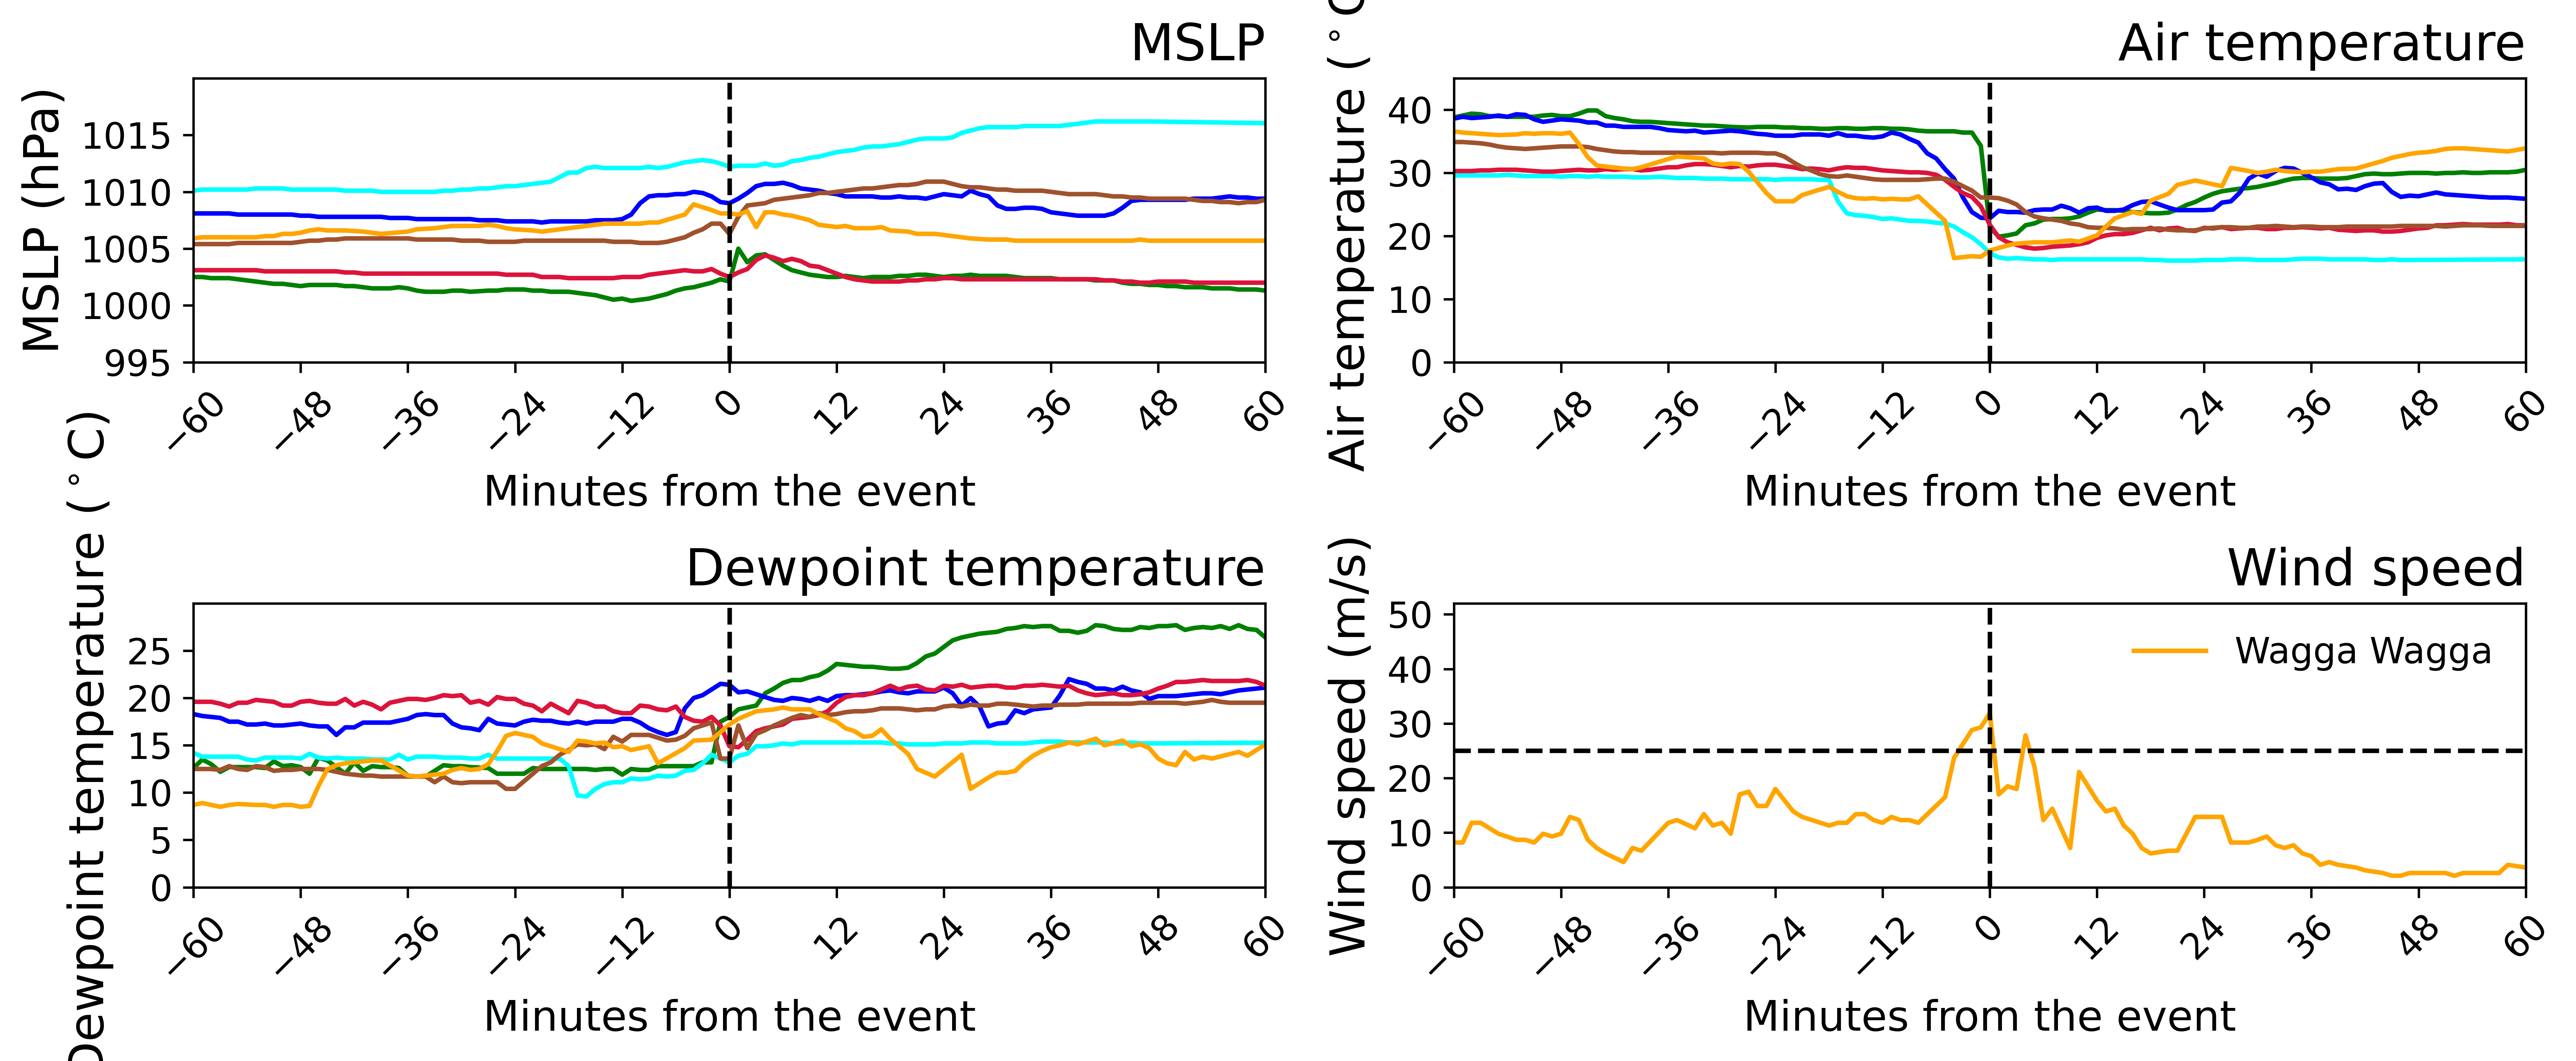

In [58]:

plt.figure()  # create a plot figure


#plt.xlabel('Minutes from the event', fontsize = 10)
plt.rcParams["figure.figsize"] = (18,11)
plt.rcParams['figure.dpi'] = 600


plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.plot(rilapses, ri_test['mslp'], color='green',label='Richmond RAAF')
plt.plot(sylapses, sy_test['mslp'], color='blue', label='Sydney Airport')
plt.plot(bdlapses, bd_test['mslp'], color='crimson', label='Badgerys Creek')
plt.plot(molapses, mo_test['mslp'], color='cyan', label='Moree Aero')
plt.plot(tmlapses, tm_test['mslp'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['mslp'], color='orange', label='Wagga Wagga')
plt.xlabel("Minutes from the event", fontsize=14)



plt.ylabel("MSLP (hPa)", fontsize=16)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(995,1020)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(995,1020,5))
plt.title("MSLP", loc = 'right', fontsize = 17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")




plt.subplot(2, 2, 2) # (rows, columns, panel number)
plt.plot(rilapses, ri_test['temp'], color='green',label='Richmond RAAF')
plt.plot(sylapses, sy_test['temp'], color='blue', label='Sydney Airport')
plt.plot(bdlapses, bd_test['temp'], color='crimson', label='Badgerys Creek')
plt.plot(molapses, mo_test['temp'], color='cyan', label='Moree Aero')
plt.plot(tmlapses, tm_test['temp'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['temp'], color='orange', label='Wagga Wagga')
plt.xlabel("Minutes from the event", fontsize=14)



plt.ylabel("Air temperature ($^\circ$C)", fontsize=16)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(0,45)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(0,45,10))
plt.title("Air temperature", loc = 'right', fontsize = 17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")


plt.subplot(2, 2, 3) # (rows, columns, panel number)
plt.plot(rilapses, ri_test['dew'], color='green',label='Richmond RAAF')
plt.plot(sylapses, sy_test['dew'], color='blue', label='Sydney Airport')
plt.plot(bdlapses, bd_test['dew'], color='crimson', label='Badgerys Creek')
plt.plot(molapses, mo_test['dew'], color='cyan', label='Moree Aero')
plt.plot(tmlapses, tm_test['dew'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['dew'], color='orange', label='Wagga Wagga')
plt.xlabel("Minutes from the event", fontsize=14)



plt.ylabel("Dewpoint temperature ($^\circ$C)", fontsize=16)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(0,30)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(0,30,5))
plt.title("Dewpoint temperature", loc = 'right', fontsize =17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")


plt.subplot(2, 2, 4) # (rows, columns, panel number)
# plt.plot(rilapses, ri_test['windspeed'], color='green',label='Richmond RAAF')
# plt.plot(sylapses, sy_test['windspeed'], color='blue', label='Sydney Airport')
# plt.plot(bdlapses, bd_test['windspeed'], color='crimson', label='Badgerys Creek')
# plt.plot(molapses, mo_test['windspeed'], color='cyan', label='Moree Aero')
# plt.plot(tmlapses, tm_test['windspeed'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['windspeed'], color='orange', label='Wagga Wagga')

leg = plt.legend(loc ="upper right", frameon=False, fontsize=12)

plt.ylabel("Wind speed (m/s)", fontsize=16)
plt.xlabel("Minutes from the event", fontsize=14)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(0,52)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(0,52,10))
plt.title("Wind speed", loc = 'right', fontsize = 17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")
plt.axhline(y = 25, color = "black", ls = "--")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [57]:
plt.figure()  # create a plot figure


#plt.xlabel('Minutes from the event', fontsize = 10)
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams['figure.dpi'] = 600


plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.plot(rilapses, ri_test['direction'], color='green',label='Richmond RAAF')
plt.plot(sylapses, sy_test['direction'], color='blue', label='Sydney Airport')
plt.plot(bdlapses, bd_test['direction'], color='crimson', label='Badgerys Creek')
plt.plot(molapses, mo_test['direction'], color='cyan', label='Moree Aero')
plt.plot(tmlapses, tm_test['direction'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['direction'], color='orange', label='Wagga Wagga')
plt.xlabel("Minutes from the event", fontsize=14)



plt.ylabel("Direction (degrees)", fontsize=16)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(0,360)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(0,362,45))
plt.title("Wind Direction", loc = 'right', fontsize = 17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")




plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.plot(rilapses, ri_test['precipitation'], color='green',label='Richmond RAAF')
plt.plot(sylapses, sy_test['precipitation'], color='blue', label='Sydney Airport')
plt.plot(bdlapses, bd_test['precipitation'], color='crimson', label='Badgerys Creek')
plt.plot(molapses, mo_test['precipitation'], color='cyan', label='Moree Aero')
plt.plot(tmlapses, tm_test['precipitation'], color='sienna', label='Tamworth Airport')
plt.plot(walapses, wa_test['precipitation'], color='orange', label='Wagga Wagga')
plt.xlabel("Minutes from the event", fontsize=14)



plt.ylabel("Precipitation (mm)", fontsize=16)
#plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-60,60)
plt.ylim(0,3)
plt.xticks(np.arange(-60, 62,12), rotation=60)
plt.yticks(np.arange(0,3.1,1))
plt.title("Precipitation", loc = 'right', fontsize = 17)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()